# Example of lapsing temperature varibales for the hydrological units; Upper Bow river and forcing as ERA5 
## Visualize the average elevation of the hydrological units

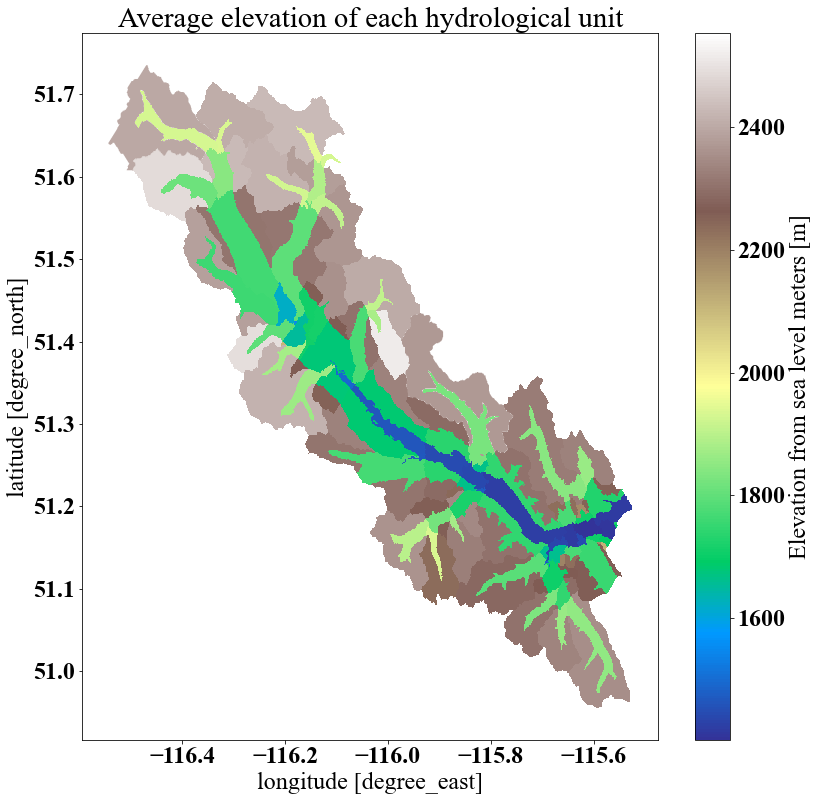

In [1]:
# first create the intersection of the two shapefile
# loading candex
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib
font = {'family' : 'Times New Roman',
         'weight' : 'bold',
         'size'   : 24}
matplotlib.rc('font', **font)

# load shapefile of the hydrological units including average elevation
shp_target = gpd.read_file('../data/target_shapefiles/Bow_merit_dem.shp')
# plot
fig, axes = plt.subplots(1,1,figsize=(13,13))
# with no normalization
shp_target.plot(column='elev_mean', cmap='terrain', legend=False, ax=axes)
norm = colors.Normalize(vmin=shp_target.elev_mean.min(), vmax=shp_target.elev_mean.max())
cbar = plt.cm.ScalarMappable(norm=norm, cmap='terrain')
# add colorbar
ax_cbar = fig.colorbar(cbar, ax=axes)
# add label for the colorbar
ax_cbar.set_label('Elevation from sea level meters [m]')
plt.xlabel('longitude [degree_east]')
plt.ylabel('latitude [degree_north]')
plt.title('Average elevation of each hydrological unit')
#plt.grid()
plt.savefig('../fig/Example7_A.png')

--------------
--------------
## Visualize the intersection of the hydrological units and ERA5 grid and their elevation difference

/Users/shg096/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/candex/candex.py:1169: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_1['AS1']  = shp_1.area
/Users/shg096/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/candex/candex.py:1181: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_2['AS2'] = shp_2.area
/Users/shg096/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/candex/candex.py:1262: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  pairs = gpd.GeoDataFrame(nei, columns=['idx1','idx2'], crs=df1.crs)
/Users/shg096/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/candex/candex.py:1266: FutureWarning: Assi

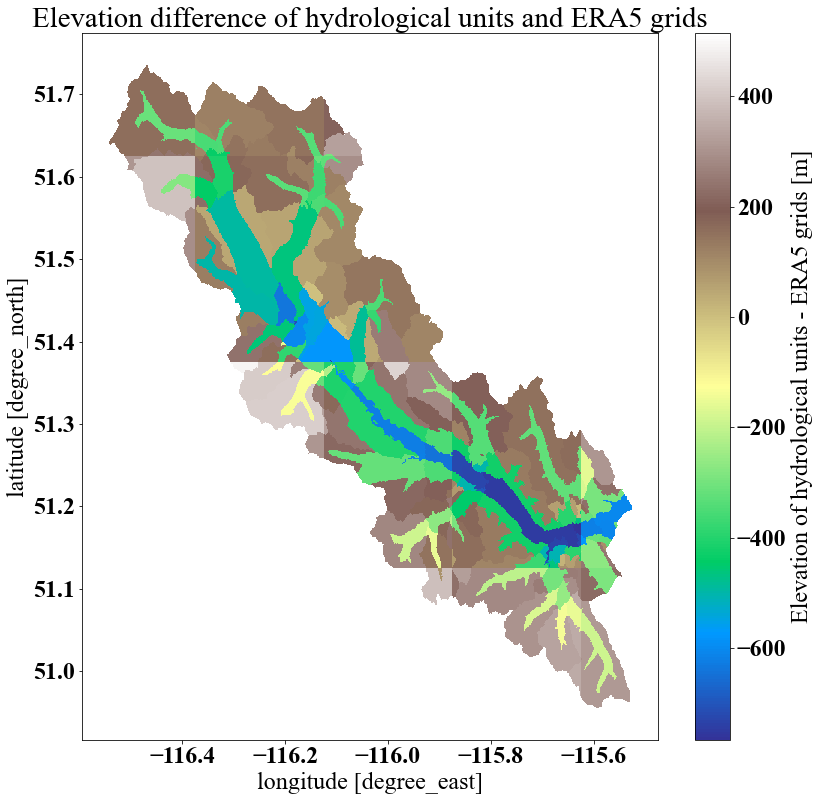

In [2]:
# first create the intersection of the two shapefile
# loading candex
from candex.candex import candex
import geopandas as gpd
import matplotlib.pyplot as plt

# initializing candex object
cndx = candex()

shp_source = gpd.read_file('../data/Source_shp_ERA5/era5_grid.shp')
shp_target = gpd.read_file('../data/target_shapefiles/Bow_merit_dem.shp')
shp_int = cndx.intersection_shp(shp_target, shp_source)
shp_int ['elev_diff'] = shp_int ['S_1_elev_mean'] - shp_int ['S_2_elev_m'] # elevation diff hydrological -ERA5
shp_int.to_file('../data/target_shapefiles/Bow_merit_dem_ERA5_grid.shp')

# plot
fig, axes = plt.subplots(1,1,figsize=(13,13))
# with no normalization
shp_int.plot(column='elev_diff', cmap='terrain', legend=False, ax=axes)
norm = colors.Normalize(vmin=shp_int.elev_diff.min(), vmax=shp_int.elev_diff.max())
cbar = plt.cm.ScalarMappable(norm=norm, cmap='terrain')
# add colorbar
ax_cbar = fig.colorbar(cbar, ax=axes)
# add label for the colorbar
ax_cbar.set_label('Elevation of hydrological units - ERA5 grids [m]')
plt.xlabel('longitude [degree_east]')
plt.ylabel('latitude [degree_north]')
plt.title('Elevation difference of hydrological units and ERA5 grids')
#plt.grid()
plt.savefig('../fig/Example7_B.png')


---------------
---------------
## Remapping the temprature and precipitation to elements of hydrological units and ERA5 grids

In [3]:
# loading candex
from candex.candex import candex

# initializing candex object
cndx = candex()

# specifying candex objects
# name of the case; the temporary, remapping and remapped file names include case name
cndx.case_name                = 'Bow_lapse_temprature_detailed'              
# temporary path that the candex generated GIS files and remapped file will be saved
cndx.temp_dir                 = '../temporary/'
# name of target shapefile that the source netcdf files should be remapped to
cndx.target_shp               = '../data/target_shapefiles/Bow_merit_dem_ERA5_grid.shp'
# name of netCDF file(s); multiple files can be specified with *
cndx.source_nc                = '../data/Source_nc_ERA5/ERA5_NA_*.nc'
# name of shapefile for the source netCDF file(s)
cndx.source_shp               = '../data/Source_shp_ERA5/era5_grid.shp'
# name of latitude field for the source shapefile
cndx.source_shp_lat           = 'lat'
# name of longitude field for the source shapefile
cndx.source_shp_lon           = 'lon'
# name of variables from source netCDF file(s) to be remapped
cndx.var_names                = ['airtemp','pptrate']
# name of variable longitude in source netCDF files
cndx.var_lon                  = 'longitude'
# name of variable latitude in source netCDF files
cndx.var_lat                  = 'latitude'
# name of variable time in source netCDF file; should be always time
cndx.var_time                 = 'time'
# location where the remapped netCDF file will be saved
cndx.output_dir               = '../output/'
# format of the variables to be saved in remapped files,
# if one format provided it will be expanded to other variables
cndx.format_list              = ['f4']
# fill values of the variables to be saved in remapped files,
# if one value provided it will be expanded to other variables
cndx.fill_value_list          = ['-9999.00']
# if required that the remapped values to be saved as csv as well

# execute candex
cndx.run_candex()

no author name is provide and the author name is changed to (author name)!
candex is given multiple varibales to be remapped but only on format and fill valuecandex repeat the format and fill value for all the variables in output files
candex will remap variable  airtemp  from source file to variable  airtemp  in remapped NeCDF file
candex will remap variable  pptrate  from source file to variable  pptrate  in remapped NeCDF file
candex detects that target shapefile is in WGS84 (epsg:4326)
candex detects that no field for ID is provided in sink/target shapefile
arbitarary values of ID are added in the field ID_t
candex detects that either of the fields for latitude or longitude is not provided in sink/target shapefile
calculating centroid of shapes in equal area projection
point shapefile for centroid of the shapes is saves here:
../temporary/Bow_lapse_temprature_detailed_centroid.shp
candex detects that no field for latitude is provided in sink/target shapefile
latitude values are add

/Users/shg096/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/candex/candex.py:113: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_2 ['lat_temp'] = shp_2.centroid.y
/Users/shg096/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/candex/candex.py:114: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_2 ['lon_temp'] = shp_2.centroid.x
/Users/shg096/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/candex/candex.py:1262: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  pairs = gpd.GeoDataFrame(nei, columns=['idx1','idx2'], crs=df1.crs)
/Users/shg096/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/candex/candex

------REMAPPING------
     ID_t      lat_t       lon_t  order_t
0       1  51.151817 -115.580275        1
1       2  51.160431 -115.575118        2
2       3  51.172347 -115.572209        3
3       4  51.190237 -115.614121        4
4       5  51.176271 -115.607741        5
..    ...        ...         ...      ...
202   203  51.591042 -116.401065      203
203   204  51.618235 -116.497203      204
204   205  51.627554 -116.428390      205
205   206  51.670149 -116.455673      206
206   207  51.663538 -116.435991      207

[207 rows x 4 columns]
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111

------------
------------
# Visualizing the temprature varibale for the elements of ERA5 grids and hydrological units

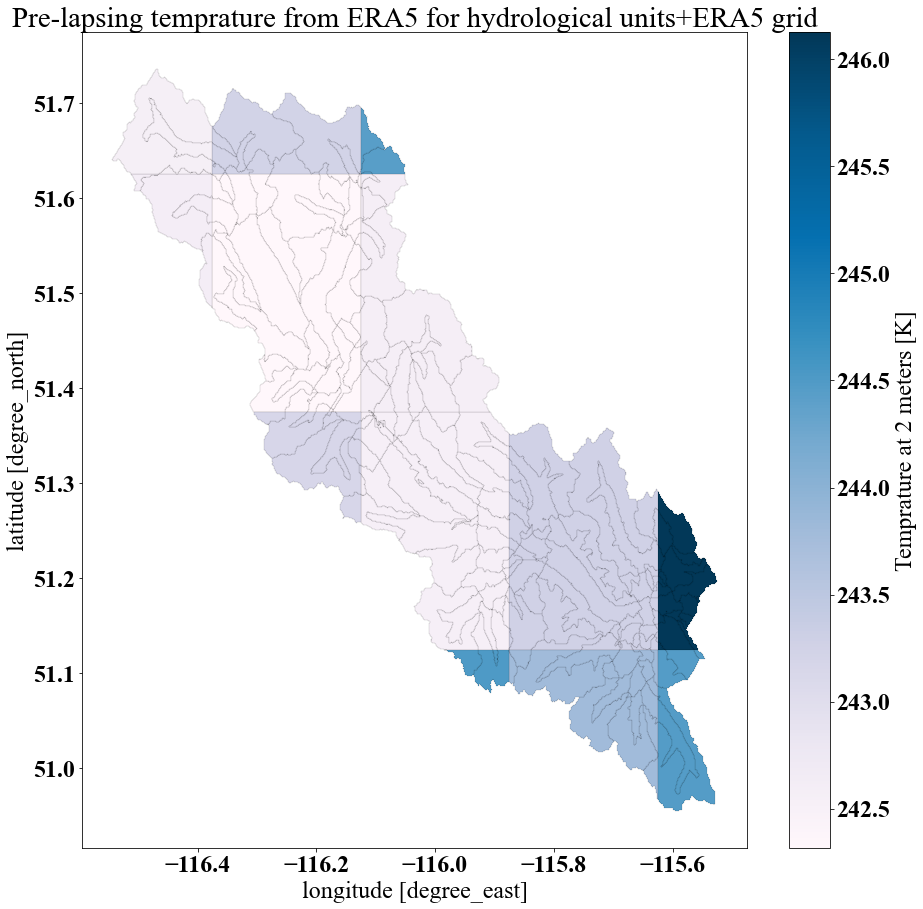

In [5]:
# visualize the result
import geopandas as gpd
import xarray as xr
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'Times New Roman',
         'weight' : 'bold',
         'size'   : 24}
matplotlib.rc('font', **font)

# visualize the remapped netCDF for the first file, first time step
# target nc file
nc_names = sorted(glob.glob (cndx.output_dir + cndx.case_name + '*.nc'))
ds       = xr.open_dataset(nc_names[0]) # the first netcdf file
values   = ds.airtemp [0,:] # the first time frame of the first 
IDs      = ds.ID [:] # get the ID
# create a data frame for the model simulation
df = pd.DataFrame()
df ['value'] = values
df ['ID_t']    = IDs  # .astype(int)
df = df.sort_values (by = 'ID_t')
# load the shape file target that is generated by candex (with consistent IDs)
shp_target = gpd.read_file(cndx.temp_dir+ cndx.case_name + '_target_shapefile.shp') # load the target shapefile
shp_target ['ID_t'] = shp_target ['ID_t'].astype(float)
shp_target = shp_target.sort_values(by='ID_t')# sort on values
shp_target = pd.merge_asof(shp_target, df, on='ID_t', direction='nearest')
shp_target = shp_target.set_geometry('geometry') #bring back the geometry filed; pd to gpd
# plotting
fig, axes = plt.subplots(1,1,figsize=(15,15))
shp_target.plot(column= 'value',cmap='PuBu', edgecolor='k',linewidth = 0.1, ax = axes )#, legend=True)
norm = colors.Normalize(vmin=shp_target.value.min(), vmax=shp_target.value.max())
cbar = plt.cm.ScalarMappable(norm=norm, cmap='PuBu')
# add colorbar
ax_cbar = fig.colorbar(cbar, ax=axes)
# add label for the colorbar
ax_cbar.set_label('Temprature at 2 meters [K]')
plt.xlabel('longitude [degree_east]')
plt.ylabel('latitude [degree_north]')
plt.title('Pre-lapsing temprature from ERA5 for hydrological units+ERA5 grid')
#plt.grid()
plt.savefig('../fig/Example7_C.png')


----------
----------
# Lapsing temperature based on elevation difference of the ERA5 and hydrological units based on 6.5 degrees decrease in temperature for each 1000 m increase in elevation 

In [6]:
# lapsing the temprature
shp_int = gpd.read_file('../data/target_shapefiles/Bow_merit_dem_ERA5_grid.shp')
elev_diff = np.array(shp_int.elev_diff)
nc_names = sorted(glob.glob (cndx.output_dir + cndx.case_name + '*.nc'))
for nc_name in nc_names:
    # get the time and number of elementes from the netcdf file
    ds       = xr.open_dataset(nc_name) # the first netcdf file
    time_dim_len = ds.dims['time']
    element_dim_len = ds.dims['ID']
    elev_diff_vstack = np.tile(elev_diff, (time_dim_len,1))
    ds.airtemp[:] = ds.airtemp[:] - elev_diff_vstack * 6.5 /1000
    ds.to_netcdf(nc_name+'lapsed')


--------------
--------------
# Visualzing the lapsed temperature for combination of ERA5 grids and hydrological units

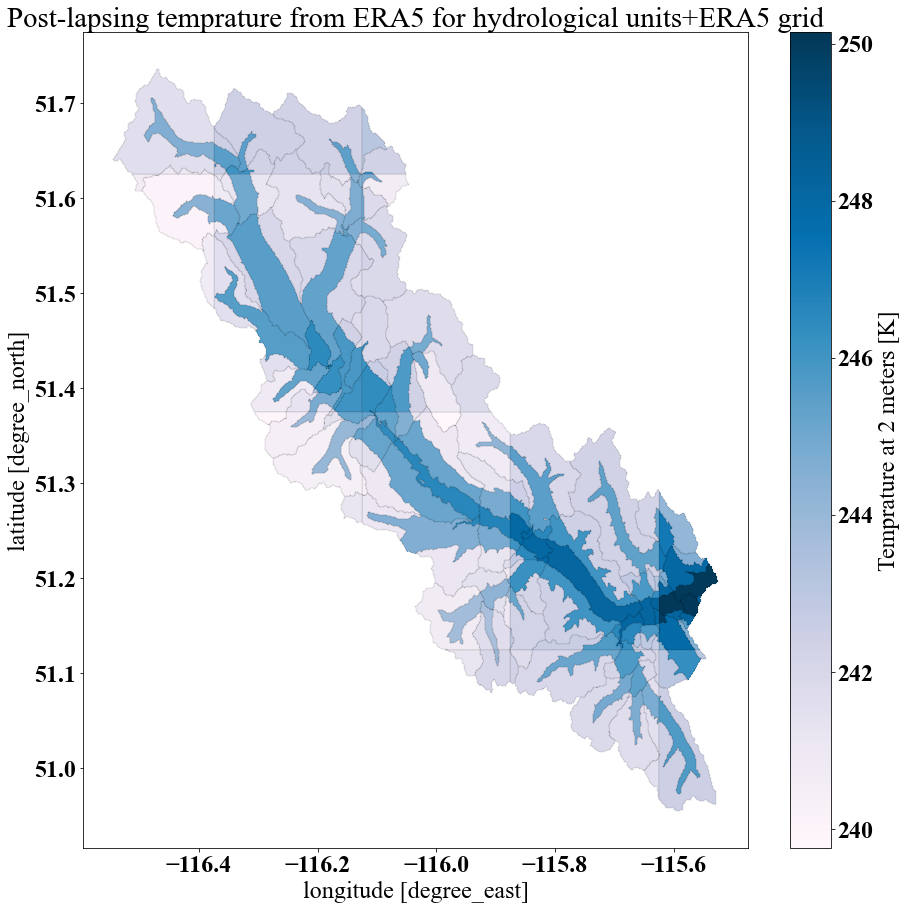

In [8]:
# visualize the result
import geopandas as gpd
import xarray as xr
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
font = {'family' : 'Times New Roman',
         'weight' : 'bold',
         'size'   : 24}
matplotlib.rc('font', **font)

# visualize the remapped netCDF for the first file, first time step
# target nc file
nc_names = sorted(glob.glob (cndx.output_dir + cndx.case_name + '*.nclapsed'))
ds       = xr.open_dataset(nc_names[0]) # the first netcdf file
values   = ds.airtemp [0,:] # the first time frame of the first 
IDs      = ds.ID [:] # get the ID
# create a data frame for the model simulation
df = pd.DataFrame()
df ['value'] = values
df ['ID_t']    = IDs  # .astype(int)
df = df.sort_values (by = 'ID_t')
# load the shape file target that is generated by candex (with consistent IDs)
shp_target = gpd.read_file(cndx.temp_dir+ cndx.case_name + '_target_shapefile.shp') # load the target shapefile
shp_target ['ID_t'] = shp_target ['ID_t'].astype(float)
shp_target = shp_target.sort_values(by='ID_t')# sort on values
shp_target = pd.merge_asof(shp_target, df, on='ID_t', direction='nearest')
shp_target = shp_target.set_geometry('geometry') #bring back the geometry filed; pd to gpd
# plotting
f, axes = plt.subplots(1,1,figsize=(15,15))
shp_target.plot(column= 'value',cmap='PuBu', edgecolor='k',linewidth = .1,ax = axes )#, legend=True)
plt.xlabel('longitude [degree_east]')
plt.ylabel('latitude [degree_north]')
plt.title('Post-lapsing temprature from ERA5 for hydrological units+ERA5 grid')
#plt.grid()
norm = colors.Normalize(vmin=shp_target.value.min(), vmax=shp_target.value.max())
cbar = plt.cm.ScalarMappable(norm=norm, cmap='PuBu')
# add colorbar
ax_cbar = fig.colorbar(cbar, ax=axes)
# add label for the colorbar
ax_cbar.set_label('Temprature at 2 meters [K]')
plt.savefig('../fig/Example7_D.png')


-------------
-------------
# Calling candex for the second time to aggregate the temprature to hydrological units (eliminating the ERA5 grids)

In [9]:
# loading candex
from candex.candex import candex

# initializing candex object
cndx = candex()

# specifying candex objects
# name of the case; the temporary, remapping and remapped file names include case name
cndx.case_name                = 'Bow_lapse_temprature_aggregate'              
# temporary path that the candex generated GIS files and remapped file will be saved
cndx.temp_dir                 = '../temporary/'
# name of target shapefile that the source netcdf files should be remapped to
cndx.target_shp               = '../data/target_shapefiles/Bow_merit_dem.shp'
# name of netCDF file(s); multiple files can be specified with *
cndx.source_nc                = '../output/Bow_lapse_temprature_detailed_remapped_1979*.nclapsed'
# name of shapefile for the source netCDF file(s)
cndx.source_shp               = '../temporary/Bow_lapse_temprature_detailed_target_shapefile.shp'
# name of latitude field for the source shapefile
cndx.source_shp_lat           = 'lat_t'
# name of longitude field for the source shapefile
cndx.source_shp_lon           = 'lon_t'
cndx.source_shp_ID            = 'ID_t'
# name of variables from source netCDF file(s) to be remapped
cndx.var_names                = ['airtemp','pptrate']
# name of variable longitude in source netCDF files
cndx.var_lon                  = 'longitude'
# name of variable latitude in source netCDF files
cndx.var_lat                  = 'latitude'
# name of variable time in source netCDF file; should be always time
cndx.var_time                 = 'time'
# location where the remapped netCDF file will be saved
cndx.output_dir               = '../output/'
# format of the variables to be saved in remapped files,
# if one format provided it will be expanded to other variables
cndx.format_list              = ['f4']
# fill values of the variables to be saved in remapped files,
# if one value provided it will be expanded to other variables
cndx.fill_value_list          = ['-9999.00']
# if required that the remapped values to be saved as csv as well

# execute candex
cndx.run_candex()

no author name is provide and the author name is changed to (author name)!
candex is given multiple varibales to be remapped but only on format and fill valuecandex repeat the format and fill value for all the variables in output files
candex will remap variable  airtemp  from source file to variable  airtemp  in remapped NeCDF file
candex will remap variable  pptrate  from source file to variable  pptrate  in remapped NeCDF file
candex detects that target shapefile is in WGS84 (epsg:4326)
candex detects that no field for ID is provided in sink/target shapefile
arbitarary values of ID are added in the field ID_t
candex detects that either of the fields for latitude or longitude is not provided in sink/target shapefile
calculating centroid of shapes in equal area projection
point shapefile for centroid of the shapes is saves here:
../temporary/Bow_lapse_temprature_aggregate_centroid.shp
candex detects that no field for latitude is provided in sink/target shapefile
latitude values are ad

/Users/shg096/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/candex/candex.py:113: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_2 ['lat_temp'] = shp_2.centroid.y
/Users/shg096/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/candex/candex.py:114: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp_2 ['lon_temp'] = shp_2.centroid.x
/Users/shg096/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/candex/candex.py:1262: FutureWarning: Assigning CRS to a GeoDataFrame without a geometry column is now deprecated and will not be supported in the future.
  pairs = gpd.GeoDataFrame(nei, columns=['idx1','idx2'], crs=df1.crs)
/Users/shg096/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/candex/candex

------REMAPPING------
     ID_t      lat_t       lon_t  order_t
0       1  51.151817 -115.580275        1
1       2  51.160431 -115.575118        2
2       3  51.172347 -115.572209        3
3       4  51.192707 -115.622017        4
4       5  51.177471 -115.611402        5
..    ...        ...         ...      ...
113   114  51.639213 -116.148346      114
114   115  51.672282 -116.303015      115
115   116  51.647872 -116.323135      116
116   117  51.667509 -116.451110      117
117   118  51.657756 -116.414225      118

[118 rows x 4 columns]
[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111

--------------
--------------
# Visualizing the lapsed temperature for the hydrological units

['../output/Bow_lapse_temprature_aggregate_remapped_1979-01-01-00-00-00.nc', '../output/Bow_lapse_temprature_aggregate_remapped_1979-01-02-00-00-00.nc', '../output/Bow_lapse_temprature_aggregate_remapped_1979-01-03-00-00-00.nc']


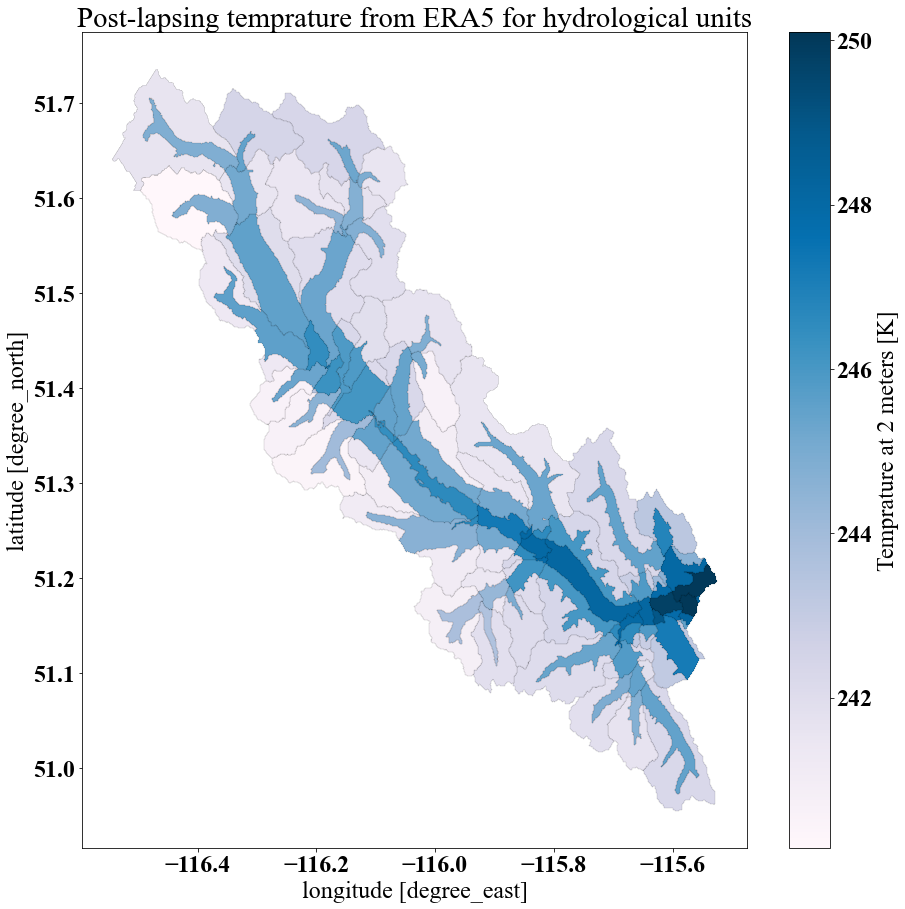

In [11]:
# visualize the result
import geopandas as gpd
import xarray as xr
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.colors as colors
font = {'family' : 'Times New Roman',
         'weight' : 'bold',
         'size'   : 24}
matplotlib.rc('font', **font)

# visualize the remapped netCDF for the first file, first time step
# target nc file
nc_names = sorted(glob.glob (cndx.output_dir + cndx.case_name + '*.nc'))
print(nc_names)
ds       = xr.open_dataset(nc_names[0]) # the first netcdf file
values   = ds.airtemp [0,:] # the first time frame of the first 
IDs      = ds.ID [:] # get the ID
# create a data frame for the model simulation
df = pd.DataFrame()
df ['value'] = values
df ['ID_t']    = IDs  # .astype(int)
df = df.sort_values (by = 'ID_t')
# load the shape file target that is generated by candex (with consistent IDs)
shp_target = gpd.read_file(cndx.temp_dir+ cndx.case_name + '_target_shapefile.shp') # load the target shapefile
shp_target ['ID_t'] = shp_target ['ID_t'].astype(float)
shp_target = shp_target.sort_values(by='ID_t')# sort on values
shp_target = pd.merge_asof(shp_target, df, on='ID_t', direction='nearest')
shp_target = shp_target.set_geometry('geometry') #bring back the geometry filed; pd to gpd
# plotting
fig, axes = plt.subplots(1,1,figsize=(15,15))
shp_target.plot(column= 'value',cmap='PuBu', edgecolor='k',linewidth = .1,ax = axes )#, legend=True)
plt.xlabel('longitude [degree_east]')
plt.ylabel('latitude [degree_north]')
plt.title('Post-lapsing temprature from ERA5 for hydrological units')
#plt.grid()
norm = colors.Normalize(vmin=shp_target.value.min(), vmax=shp_target.value.max())
cbar = plt.cm.ScalarMappable(norm=norm, cmap='PuBu')
# add colorbar
ax_cbar = fig.colorbar(cbar, ax=axes)
# add label for the colorbar
ax_cbar.set_label('Temprature at 2 meters [K]')
plt.savefig('../fig/Example7_E.png')
